In [1]:
import sys
sys.path.append("..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-urdu'
MODEL_NAME = 'bert-base-multilingual-uncased'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مجھے دوستوں اور عزیزوں کے خاندانوں کے لئے مجھے موت اور زخمیوں میں زخمی کر دیا گیا 0
اس ہفتے ہمارے نئے گھر میں منتقل ہونے کا انتظار نہیں کر سکتے اس ہفتے کے آخر میں اور ہفتے میں ایک ہفتے میں  لطف اندوز ہونے کے لئے  مسلمان VPN پی این آئی پی پی پی PPP VPN 0
اِس ویب سائٹس کے بارے میں کیا کہا جا سکتا ہے کہ... 0
مُلک سے گزرنے والے راستے پر #ہم @m @m, @m_m, @m 0
برائے مہربانی.آپ کے پیچھے چلیں. %d 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

مجھے دوستوں عزیزوں خاندانوں مجھے موت زخمیوں میں زخمی کر دیا گیا 0
اس ہفتے ہمارے نئے گھر میں منتقل ہونے کا انتظار نہیں کر سکتے اس ہفتے میں ہفتے میں ہفتے میں لطف اندوز ہونے مسلمان vpn پی این پی پی پی ppp vpn 0
اِس ویب سائٹس بارے میں کیا کہا جا سکتا 0
مُلک سے گزرنے راستے m m mm m 0
برائے مہربانیآپ پیچھے d 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.10it/s, loss=0.389]


Train loss 0.4499934098192017 accuracy 0.7797668029725658
Validation loss 0.406105252290235 accuracy 0.8007975693125713
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8007975693125713
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 618/618 [03:22<00:00,  3.05it/s, loss=0.255]


Train loss 0.381804474566168 accuracy 0.820823152590867
Validation loss 0.39067103619714383 accuracy 0.810938093429548
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.810938093429548
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=0.198]


Train loss 0.34661533719706306 accuracy 0.84069933788249
Validation loss 0.4037684786666944 accuracy 0.8017850360805165
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=0.0353]


Train loss 0.30992647365917086 accuracy 0.8589677043638988
Validation loss 0.4275115096163981 accuracy 0.8003418154196734
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.09it/s, loss=0.0125]


Train loss 0.27617853280596893 accuracy 0.8763372115104635
Validation loss 0.482720297083114 accuracy 0.8064944929737942
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.09it/s, loss=0.00488]


Train loss 0.24293268120073047 accuracy 0.8935674587600805
Validation loss 0.559624400098347 accuracy 0.8099126471705279
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.00984]


Train loss 0.21008743095877777 accuracy 0.9091265872463254
Validation loss 0.6469261377181822 accuracy 0.8117736422331941
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.8117736422331941
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=0.00307]


Train loss 0.18031347763097716 accuracy 0.9233817366975149
Validation loss 0.6443746350343945 accuracy 0.8036460311431827
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=0.00114]


Train loss 0.15471709506852932 accuracy 0.9351175480130145
Validation loss 0.6948362746574346 accuracy 0.7957462969996203
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.09it/s, loss=0.0019]


Train loss 0.13041331348349236 accuracy 0.9461317398625125
Validation loss 0.7263573691682909 accuracy 0.7954424610710217
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 618/618 [03:18<00:00,  3.11it/s, loss=0.000942]


Train loss 0.11869728868423349 accuracy 0.9522971553001051
Validation loss 0.7439538130482424 accuracy 0.7943410558298519
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 618/618 [03:18<00:00,  3.12it/s, loss=0.000468]


Train loss 0.10174223507574041 accuracy 0.9590702502880147
Validation loss 0.8133070801646964 accuracy 0.8015571591340677
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


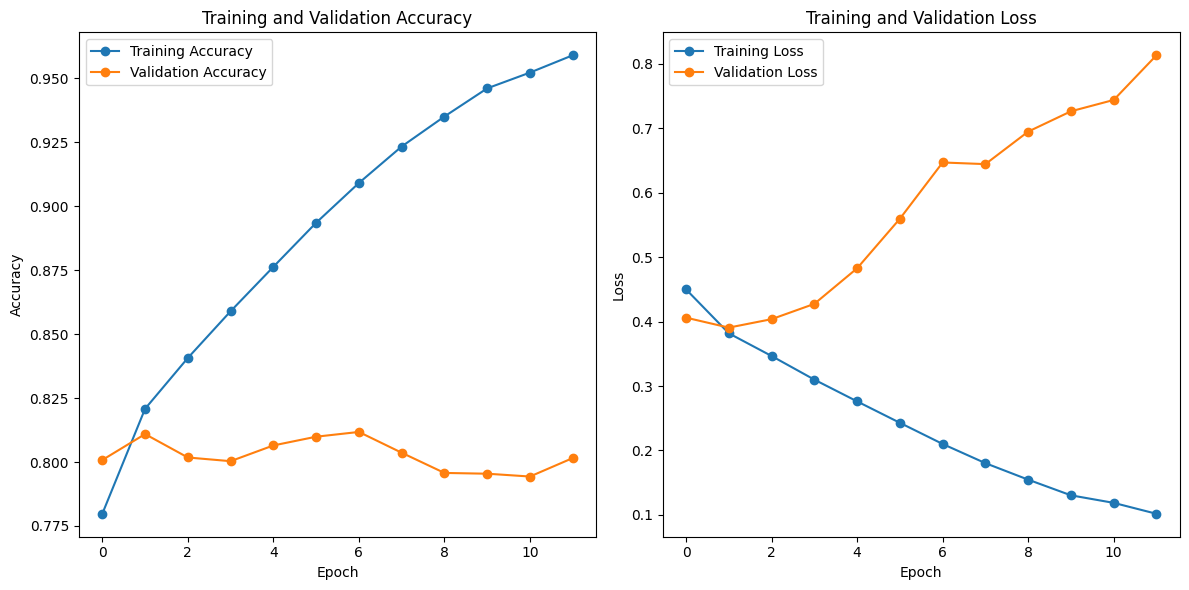

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.7973034561336878 Test Loss: 0.8436221151965336


Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.85      0.83      0.84     16513
        Hate       0.72      0.75      0.73      9817

    accuracy                           0.80     26330
   macro avg       0.78      0.79      0.79     26330
weighted avg       0.80      0.80      0.80     26330



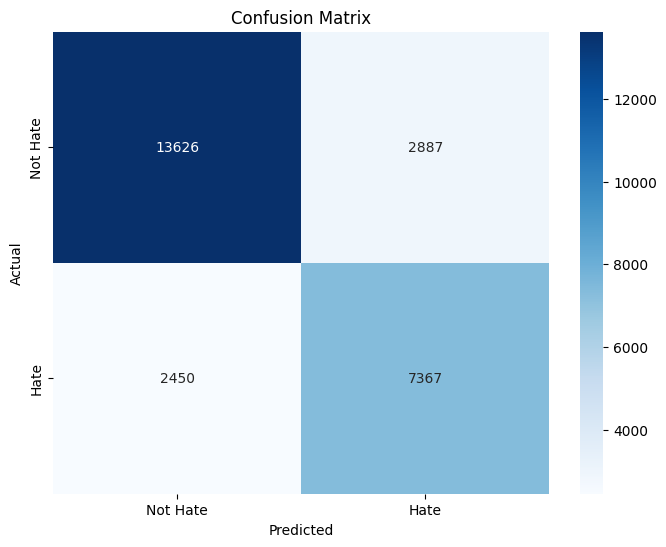

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Not Hate Speech 
Confidence: 1.00
